# Classification with Neural Network example

In this notebook, an example of classification using neural networks is given. For this, the MNIST dataset (https://www.tensorflow.org/datasets/catalog/mnist) is used. This dataset includes 60'000 training and 10'000 validation samples. Each sample is a 28 by 28 greyscale image depicting a number from 0 to 9. Our goal is to predict this number correctly from the image.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

import os
os.chdir("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML")

import OrionML as orn

### Load the data

The data is saved in csv files where each row corresponds to 1 sample. The first column is the correct number depicted on the image and the remaining columns contain the information about the image. The training set is split between two csv files each containing 30'000 examples. These are loaded and then merged to one dataframe.

In [5]:
df1 = pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\MNIST\\mnist_train1.csv", 
                   delimiter=",", header=None)

df2 = pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\MNIST\\mnist_train2.csv", 
                   delimiter=",", header=None)

df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

df_val = pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\MNIST\\mnist_test.csv", 
                   delimiter=",", header=None)


df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first 10 samples in the training set are shown below.

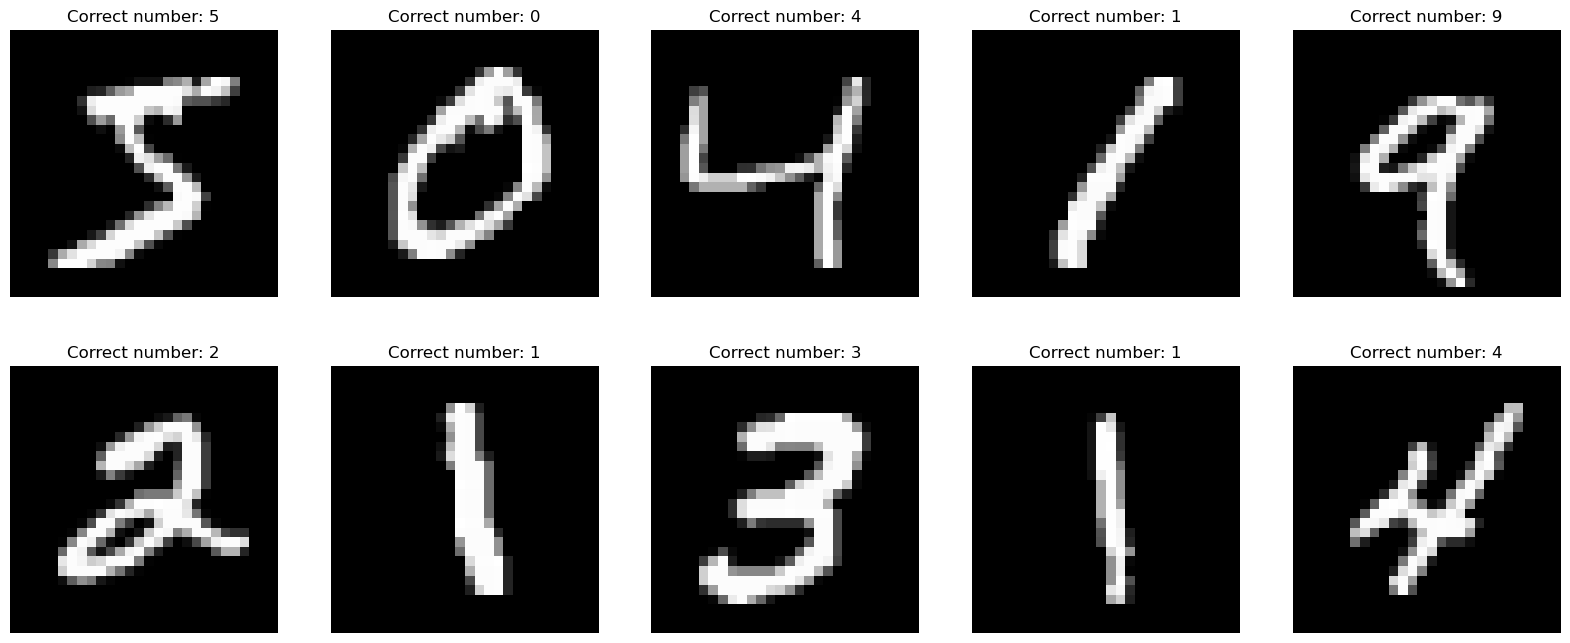

In [7]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,8))

for index,ax in enumerate(axs.flatten()):
    curr_data = np.array(df.iloc[index])
    correct_number = curr_data[0]
    image_data = curr_data[1:].reshape(28,28)
    ax.imshow(image_data, cmap="grey")
    ax.set_title(f"Correct number: {correct_number}")
    ax.axis("off")

(-0.5, 27.5, 27.5, -0.5)

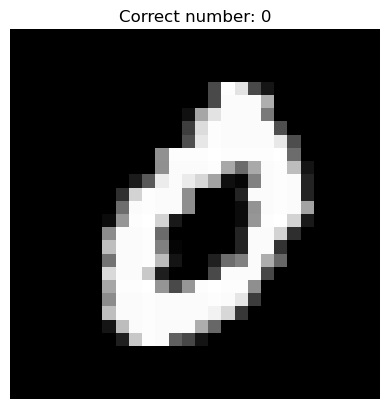

In [8]:
curr_data = np.array(df.iloc[37])
correct_number = curr_data[0]
image_data = curr_data[1:].reshape(28,28)
plt.imshow(image_data, cmap="grey")
plt.title(f"Correct number: {correct_number}")
plt.axis("off")

Below two histograms can be seen showing the number of samples for each number are in the training and validation set. Both distributions look similar and there is no number that has substantially less training or validation samples than the rest.

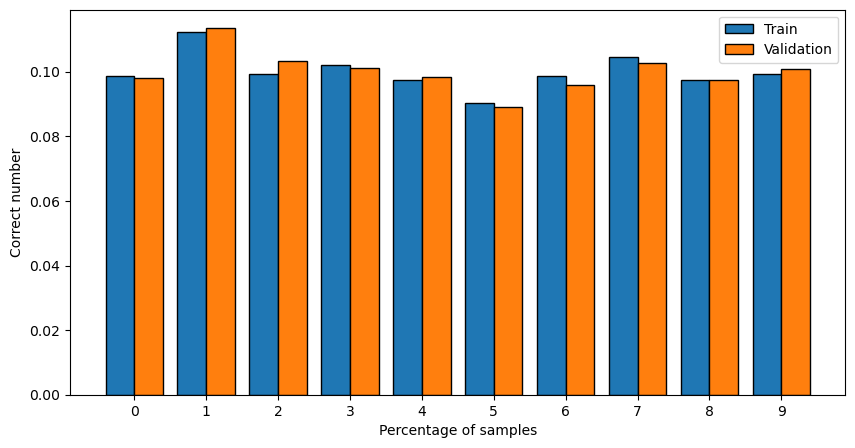

In [10]:
target_train = np.array(df)[:,0]
target_val = np.array(df_val)[:,0]

hist_train = np.array([len([val for val in target_train if val==bal]) for bal in range(10)])
hist_val = np.array([len([val for val in target_val if val==bal]) for bal in range(10)])
hist_train = hist_train/np.sum(hist_train)
hist_val = hist_val/np.sum(hist_val)

plt.figure(figsize=(10,5))

plt.bar(np.arange(10)-0.4, hist_train, width=0.4, align="edge", edgecolor="black", linewidth=1, label="Train")
plt.bar(np.arange(10)+0, hist_val, width=0.4, align="edge", edgecolor="black", linewidth=1, label="Validation")
plt.legend(loc="best")
plt.xticks(ticks=np.arange(10))
plt.xlabel(xlabel="Percentage of samples")
plt.ylabel(ylabel="Correct number")
plt.show()

# Training the model

First, for both the training and validation sets the training and target data is separated.

In [71]:
np.random.seed(0)

train_X = np.array(df.iloc[:,1:])
train_y_col = np.array(df.iloc[:,0]).reshape(-1,1)
val_X = np.array(df_val.iloc[:,1:])
val_y_col = np.array(df_val.iloc[:,0]).reshape(-1,1)

train_y = np.zeros((len(train_y_col), 10))
for i in range(len(train_y)):
    train_y[i][train_y_col[i]] = 1
    
val_y = np.zeros((len(val_y_col), 10))
for i in range(len(val_y)):
    val_y[i][val_y_col[i]] = 1

Now a Sequential with the structure for the Neural Network can be defined. This Sequential can be used to define a neural network.

In [92]:
seq = orn.Sequential([orn.Layer.Linear(784, 128, activation="relu"), orn.Layer.Dropout(0.3), orn.Layer.Linear(128, 10, activation="softmax")])

nn = orn.NeuralNetwork(seq, loss="hinge", optimizer="gd", learning_rate=1e-3, verbose=True)

Now the training data can be used to train the model.

In [95]:
nn.fit(train_X, train_y, epochs=100, batch_size=128)

Iteration    1 training Loss:    1.038
Iteration   10 training Loss:    0.915
Iteration   20 training Loss:   0.9056
Iteration   30 training Loss:   0.9064
Iteration   40 training Loss:   0.9055
Iteration   50 training Loss:   0.9026
Iteration   60 training Loss:   0.9026
Iteration   70 training Loss:   0.9022
Iteration   80 training Loss:   0.9029
Iteration   90 training Loss:   0.9025
Iteration  100 training Loss:   0.9056


Below the training loss for each epoch can be seen. A lower learning rate might improve the model performance, but would also need to increase the number of training epochs needed.

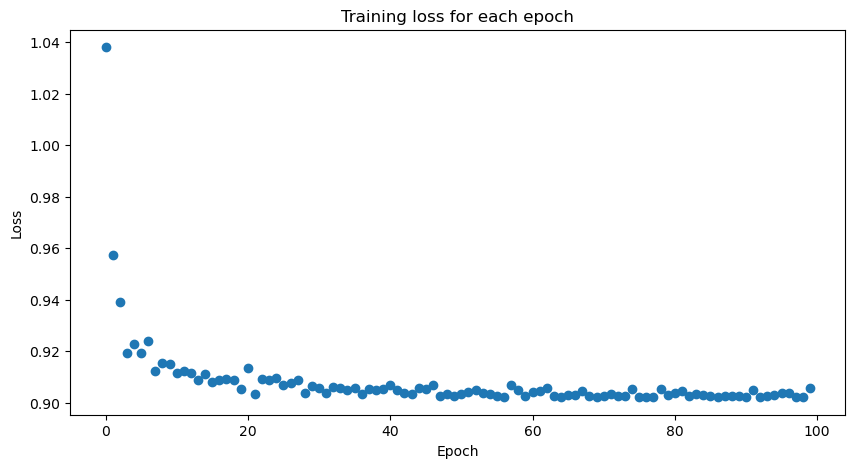

In [126]:
plt.figure(figsize=(10,5))

J_h = nn.J_h
plt.scatter(np.arange(len(J_h)), J_h, label="Training loss")
plt.xlabel(xlabel="Epoch")
plt.ylabel(ylabel="Loss")
plt.title("Training loss for each epoch")
#plt.yscale("log")
plt.show()

Now the numbers for the test set can be predicted. These predictions consist of arrays filled with the probabilities that a sample belongs to each class. These probabilities are used to choose one class for each sample. We can then check the accuracy of our predictions.

In [129]:
np.random.seed(0)

y_pred = seq(val_X)
pred = np.array([np.random.multinomial(1,val) for val in y_pred])
same_arr = np.array([np.array_equal(val_y[i], pred[i]) for i in range(len(val_y))])
wrong_num = len(val_y)-np.sum(same_arr)
acc = np.sum(same_arr)/len(val_y)

print(f"Number of wrong predictions: {wrong_num:3.0f}.")
print(f"Percentage of correctly predicted samples: {round(100*acc):2.1f}%.")

Number of wrong predictions: 298.
Percentage of correctly predicted samples: 97.0%.


Let's take a look at the confusion matrix.

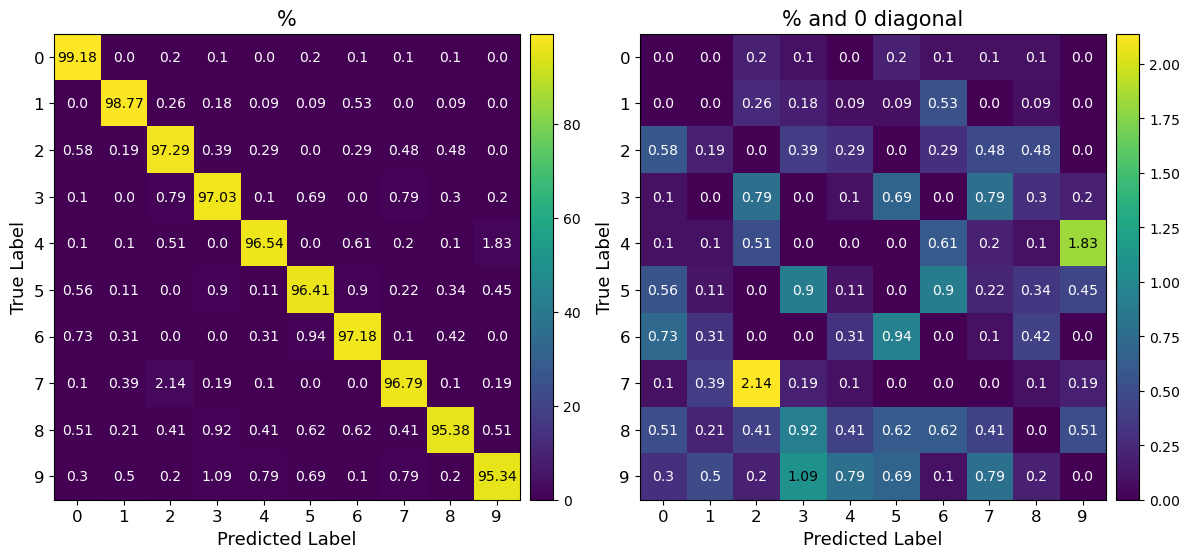

In [132]:
cfm = confusion_matrix(np.argmax(val_y, axis=1), np.argmax(pred, axis=1))
labels = [str(val) for val in range(10)]

orn.utils.plot_confusion_matrix(cfm, labels)